In [35]:
# Suraj Adyapadi  1NT20IS012
# Aman Aftab      1NT20I0S16
# Pranava Aithal  1NT20IS112
# Sumanth Kamath  1NT20IS172


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
train_set = pd.read_csv(r"C:\Users\amana\Downloads\train.csv")
test_set = pd.read_csv(r"C:\Users\amana\Downloads\test.csv")

## Variable Identification
First we will explore each variable first, I want to find out the data type of each and how many null entries I have in the dataset.

In [11]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are going to change the index to Passenger ID as this is the same as the index we have already making the column redundent.

In [12]:
train_set = train_set.set_index('PassengerId')

In [13]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This shows we have a few text columns and quite a big handful of null entries. Also Cabin has a huge amount of null entires so we will have to do something about this.

In [14]:
train_set.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Univariate Analysis
Now we will visualize some features to try and find some outliers and see if we can find some interesting stats.

<BarContainer object of 3 artists>

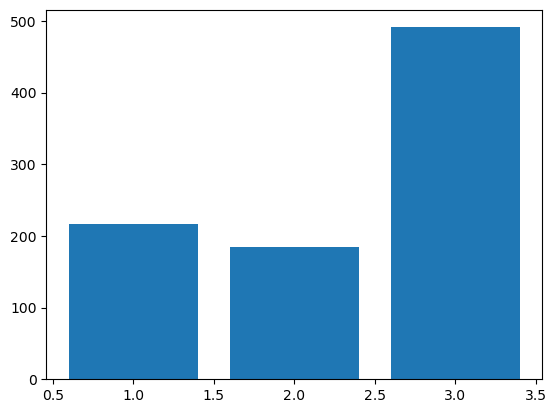

In [15]:
plt.bar(train_set['Pclass'].unique(), train_set['Pclass'].value_counts())

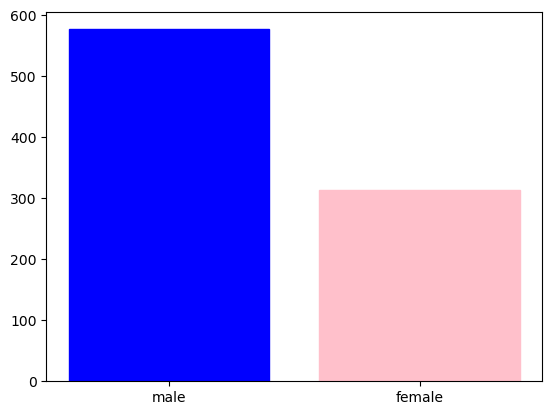

In [16]:
bar = plt.bar(train_set['Sex'].unique(), train_set['Sex'].value_counts())
bar[0].set_color('blue')
bar[1].set_color('pink')
plt.show()

<AxesSubplot:>

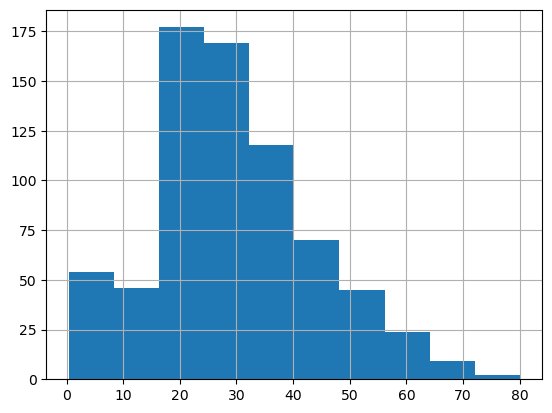

In [17]:
train_set['Age'].hist()

## Bi-variate Analysis
Now we will compare features against each other to try and find some correlation between them.

This shows that you are more likely to survive if you are a woman as they were sent of the ship first and over 5 times more likley to not survive if you are a man.

<AxesSubplot:xlabel='Survived,Gender'>

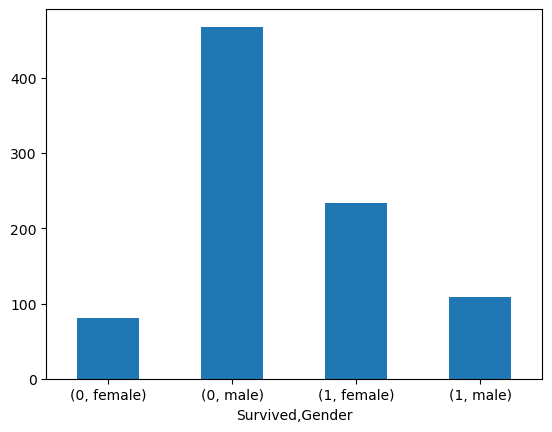

In [18]:
df = pd.DataFrame({'Gender': train_set['Sex'], 'Survived': train_set['Survived']})
total_counts = df.groupby(['Survived', 'Gender']).size()
total_counts.plot.bar(rot=0)

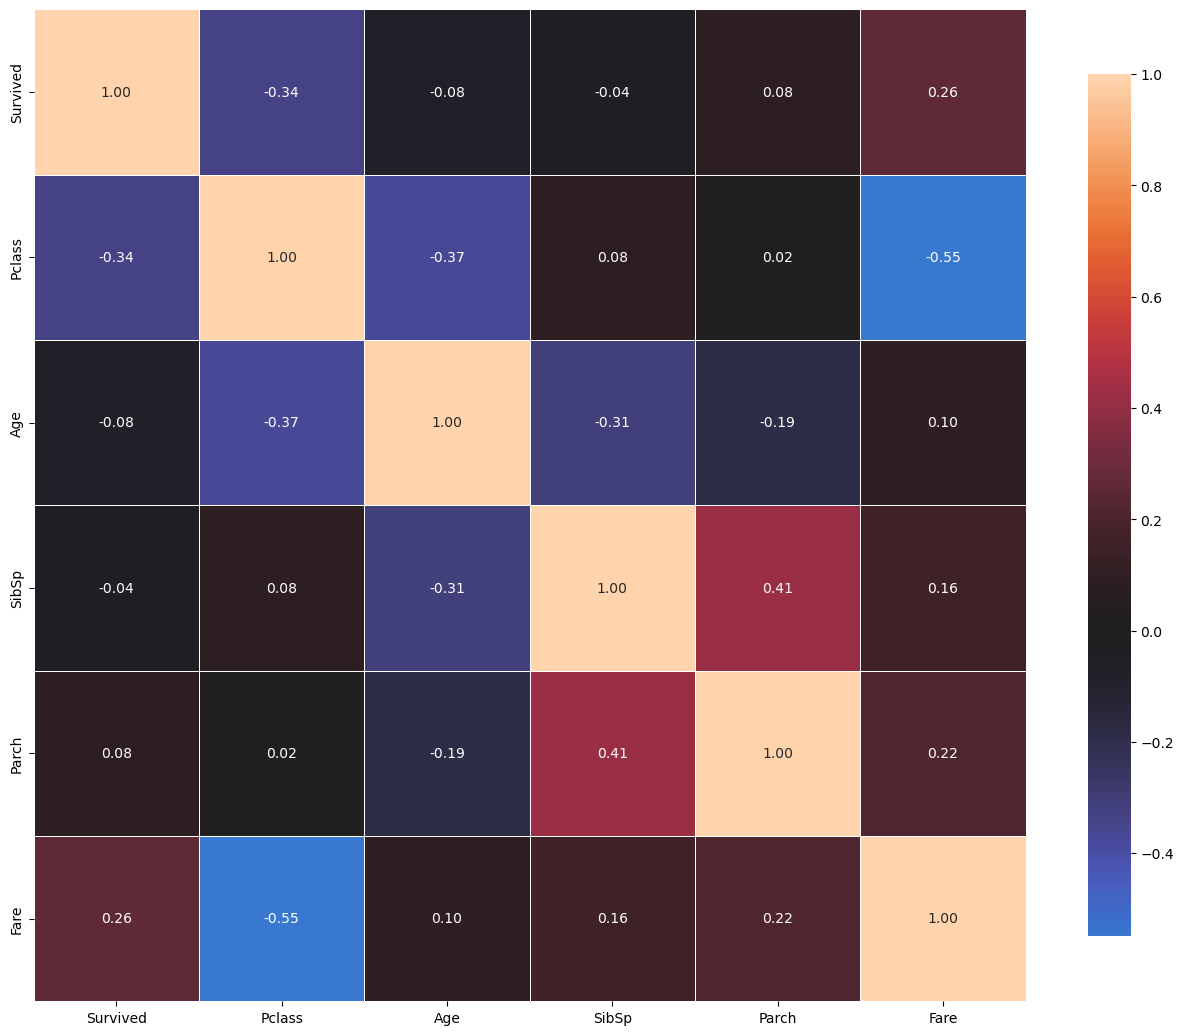

In [19]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(16,16))
    sb.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(train_set)

## Missing Values
Now we will treat the missing values by first removing the redundant columns like Name, Ticket and Cabin aswel as removing the little handful of null rows.

In [20]:
def values_drop(set):
    set = set.drop('Name', axis=1)
    set = set.drop('Ticket', axis=1)
    set = set.drop('Cabin', axis=1)
    set = set.dropna()
    return set
def values_drop_test(set):
    set = set.drop('Name', axis=1)
    set = set.drop('Ticket', axis=1)
    set = set.drop('Cabin', axis=1)
    return set
train_set = values_drop(train_set)
test_set = values_drop_test(test_set)

In [21]:
test_set = test_set.replace(np.nan, 0)

In [22]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Encode Categorical features
Now we will use One Hot Encoding to chnage the Sex and Embarked columns to be continuous variables.

In [23]:
survived = train_set[['Survived']]
train_set = train_set.drop("Survived", axis=1)

In [24]:
sex_cat = train_set[["Sex"]]
emb_cat = train_set[["Embarked"]]

In [25]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
sex_cat_encoded = OHE.fit_transform(sex_cat)
sex_cat_encoded.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [26]:
emb_cat_encoded = OHE.fit_transform(emb_cat)
emb_cat_encoded.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [27]:
train_num = train_set.drop(["Sex", "Embarked"], axis=1)

Here we create a full pipeline of transformations so I can easily call it on new entries and exisitng ones.

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attribs = list(train_num)
cat_attribs = ["Sex", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
train_prepared = full_pipeline.fit_transform(train_set)

In [29]:
test_prepared = full_pipeline.fit_transform(test_set)

## Train Models
Now we will train a neural network and optimize it as best I can without overfitting and underfitting.

In [30]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

X = train_prepared
y = survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [31]:
X_train.shape

(640, 10)

In [32]:
def create_network():
    model = keras.models.Sequential([
        keras.layers.Dense(100, activation='relu', input_dim=10),
        keras.layers.Dense(66, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model
def evaluate(model):
    model.summary()
    model.compile(optimizer=keras.optimizers.SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=40, epochs=30, validation_split=.1,
                       callbacks=[keras.callbacks.EarlyStopping(patience=5)])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 66)                6666      
                                                                 
 dense_2 (Dense)             (None, 1)                 67        
                                                                 
Total params: 7833 (30.60 KB)
Trainable params: 7833 (30.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
15/15 [==============================] - 0s 11ms/step - loss: 0.6658 - accuracy: 0.6042 - val_loss: 0.6814 - val_accuracy: 0.5469
Epoch 2/30
15/15 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.6059 - val_loss: 0.6643 - val_accuracy: 0.5469
Epoch 3/30
15/15 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6094 - val_loss: 0.6494 - val_accuracy: 0.5469
Epoch 4/30
15/15 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.6233 - val_loss: 0.6363 - val_accuracy: 0.5625
Epoch 5/30
15/15 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.6441 - val_loss: 0.6251 - val_accuracy: 0.5938
Epoch 6/30
15/15 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.6684 - val_loss: 0.6142 - val_accuracy: 0.6250
Epoch 7/30
15/15 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.6910 - val_loss: 0.6039 - val_accuracy: 0.6406
Epoch 8/30
15/15 [=

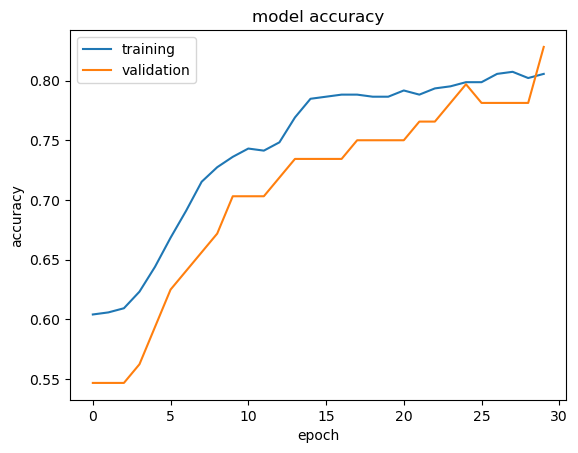

In [33]:
model = create_network()
evaluate(model)

This looks like it is fair on all three sets which is great news!

In [34]:
model_acc = model.evaluate(X_test, y_test)
print(" Model Accuracy is : {0:.1f}%".format(model_acc[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8472
 Model Accuracy is : 84.7%
